In [19]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from dataset_clevr_ryan import BoundingBox, Object, Relation, RelationalDataset, draw_scene_graph, draw_bboxes
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
bbox_raw1 = np.array([0.0,0.09,0.33,0.76])
bbox_raw2 = np.array([0.55,0.11,1.0,0.8])

bbox_raw1 = bbox_raw1 * 128
bbox_raw2 = bbox_raw2 * 128


bbox1 = BoundingBox(bbox_raw1, "lurb")
bbox2 = BoundingBox(bbox_raw2, "lurb")

image = draw_bboxes([bbox1, bbox2])
print(str(bbox1), str(bbox2))
image
print(bbox1.normalized_output(), bbox2.normalized_output())

BBOX(cx=21.12, cy=54.4, w=42.24, h=85.76) BBOX(cx=99.2, cy=58.24, w=57.599999999999994, h=88.32000000000001)
[0.0, 0.08999999999999997, 0.33, 0.76] [0.55, 0.10999999999999999, 1.0, 0.8]


In [4]:


class RelationalDataset2O(RelationalDataset):
    path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_2objs_balanced.npz'
    image_path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_2objs_balanced_imgs/combined_file.npz'

    def __init__(self, uncond_image_type="original", center_crop=True, pick_one_relation=False):
        super().__init__(self.path, uncond_image_type=uncond_image_type, center_crop=center_crop, pick_one_relation=pick_one_relation, image_path=self.image_path)


class RelationalDataset3O(RelationalDataset):
    path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_3objs_old.npz'
    image_path = '/viscam/projects/ns-diffusion/dataset/clevr_rel_3objs_imgs/combined_file.npz'

    def __init__(self, uncond_image_type="original", center_crop=True, pick_one_relation=False):
        super().__init__(self.path, uncond_image_type=uncond_image_type, center_crop=center_crop, pick_one_relation=pick_one_relation, image_path=self.image_path)



In [5]:
# dataset2 = RelationalDataset2O()
dataset3 = RelationalDataset3O()

import matplotlib.pyplot as plt
from numpy.random import randint as rand

AssertionError: shape_idx should be less than 4, but got 4

before: tensor([[0, 1, 1, 0, 1, 1, 7, 1, 0],
        [0, 1, 1, 0, 1, 1, 7, 1, 2],
        [1, 1, 7, 1, 0, 1, 1, 0, 1],
        [1, 1, 7, 1, 0, 1, 1, 0, 3]]) tensor([[0, 1],
        [0, 1],
        [1, 0],
        [1, 0]])


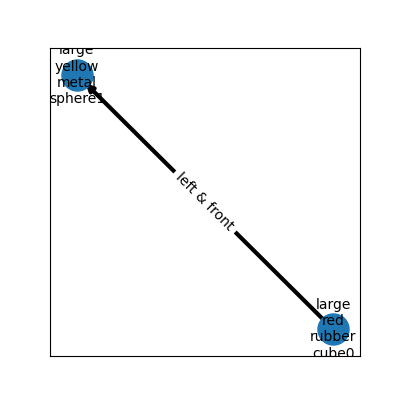

In [ ]:
rand_id = 0
clean_image, objects, relations, bboxes, generated_prompt, raw_image, raw_image_tensor, relations_ids = dataset3[rand_id]
draw_scene_graph(objects, relations, relations_ids)

In [4]:
for i in range(100):
    obj = dataset2.objects[i][0]
    print(obj.tensorize())

tensor([3, 0, 1, 1])
tensor([1, 1, 2, 0])
tensor([4, 1, 1, 1])
tensor([0, 0, 2, 1])
tensor([2, 0, 2, 0])
tensor([1, 0, 0, 0])
tensor([7, 0, 0, 1])
tensor([3, 1, 1, 1])
tensor([7, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([6, 1, 1, 1])
tensor([4, 1, 1, 0])
tensor([7, 1, 1, 0])
tensor([1, 1, 0, 1])
tensor([3, 1, 1, 1])
tensor([0, 0, 2, 0])
tensor([7, 0, 0, 1])
tensor([6, 1, 0, 0])
tensor([1, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([2, 0, 1, 1])
tensor([4, 0, 0, 1])
tensor([3, 1, 2, 0])
tensor([0, 1, 0, 1])
tensor([1, 0, 2, 1])
tensor([1, 0, 0, 0])
tensor([2, 1, 0, 0])
tensor([1, 0, 1, 1])
tensor([2, 1, 0, 1])
tensor([0, 0, 1, 1])
tensor([3, 1, 0, 1])
tensor([3, 1, 2, 1])
tensor([6, 0, 0, 1])
tensor([7, 1, 1, 1])
tensor([5, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([0, 1, 0, 0])
tensor([7, 1, 1, 1])
tensor([3, 0, 2, 1])
tensor([4, 0, 2, 0])
tensor([5, 0, 1, 1])
tensor([2, 1, 1, 1])
tensor([0, 1, 2, 0])
tensor([6, 1, 0, 1])
tensor([0, 1, 1, 1])
tensor([5, 1, 2, 1])
tensor([4, 1, 0, 1])
tensor([7, 0,

In [7]:
image0 = dataset2.annotated_images[rand_id]
image1 = dataset2.images[rand_id]
relations = dataset2.relations[rand_id]
objects = dataset2.objects[rand_id]
prompt = dataset2.prompts[rand_id]
bboxes = dataset2.bboxes[rand_id]

[]
[tensor([4, 0, 1, 1])]

[tensor([-0.4766, -0.0078,  0.2734,  0.2891])]


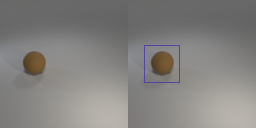

In [6]:
from utils import combine_images
image = combine_images(image1, image0)
print([rel.tensorize() for rel in relations])
print([obj.tensorize() for obj in objects])
print(prompt)
print([bbox.tensorize() for bbox in bboxes])
image

In [10]:
import numpy as np
data = np.load('/viscam/projects/ns-diffusion/dataset/clevr_rel_1obj_imgs/1.npz')